# Equations of motion with friction

From Newton's law $F=m\times a$, we know that the accelleration, that is the rate of change of velocity, is given by $\frac{dv}{dt} = a = \frac{F}{m}$. Furthermore, the change of the particles position $x$ is simply the velocity $v$.

Forces on the particle can arise from external sources and from friction. In the cases we are interested in, friction arises from motion through a viscous medium (think spoon and honey). This viscous drag is proportional to the velocity $v$ and a coefficient $\xi$  that depends on the viscosity of the medium $\eta$ and size of the object. 

If we now consider a particle under an external force $F_{ext}$, its dynamics is described by system of equations:
\begin{equation}
    \begin{split}
        \frac{dx}{dt} & = v \\
        \frac{dv}{dt} & = -\frac{1}{m} \left( F_{ext}(x,t) +  \eta v\right)\\
    \end{split}
\end{equation}
Note that we are dealing here with two coupled first-order equations: one for $x$ and one for $v$. 

## Harmonic oscillator with friction

Now consider a particle attached to a spring such that the force acting on the particle is $F_{ext} = -\gamma x$.
This means that for $x>0$, the force is pulling to the left (towards smaller $x$) and in the opposite direction for $x<0$.
Such a situation is similar to a pendulum, a marble in a bowl, or a particle in a laser trap (optical tweezer) used for single molecule experiments.
In addition to this force acting on the particle, there might also be a friction force.
Friction is typically proportional to the velocity itself $\eta v$.
Combining these two contributions, we find that this system is described by
\begin{equation}
    \begin{split}
        \frac{dx}{dt} & = v \\
        \frac{dv}{dt} & = -\frac{1}{m} \left( x\gamma +  \xi v\right)\\
    \end{split}
\end{equation}
We will now proceed and solve this system numerically. 

These equations have exact solutions as well and I encourage those more mathematically inclined to try and solve them.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [33]:
def derivative(xv, t, m, gamma, xi):
    x,v = xv
    return [v, -(x*gamma + xi*v)/m]

x = 0
v = 1
m = 1
gamma = 1
xi = 0.5

tmax = 20
T = np.linspace(0,tmax, 500)

solution = odeint(derivative, [x,v], T, args=(m, gamma, xi))
positions = solution[:,0]
velocities = solution[:,1]

Text(0.5, 0, 'time')

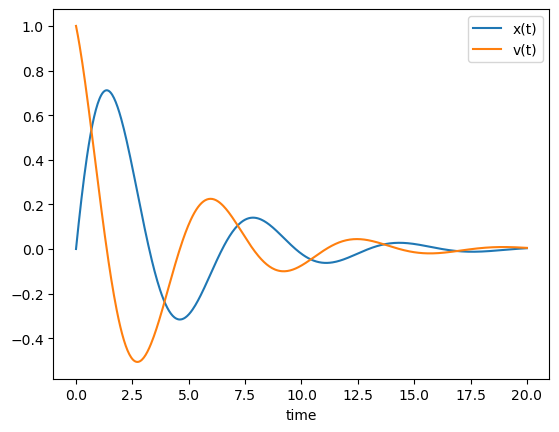

In [34]:
plt.plot(T, positions, label='x(t)')
plt.plot(T, velocities, label='v(t)')
plt.legend()
plt.xlabel('time')

### The effects of friction

In the above example, friction $\xi$ lead to a dampening of the oscillation and eventually the particles come to rest. Let's use the computer to explore this behavior a bit more systematically. 


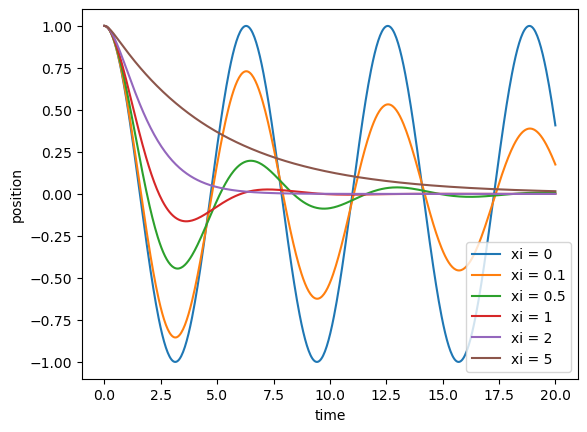

In [35]:
# make a few figure
plt.figure()

# initial condition and parameters
x = 1
v = 0
m = 1
gamma = 1

# Time points same as above
for xi in [0,0.1, 0.5, 1, 2, 5]: 
    solution = odeint(derivative, [x,v], T, args=(m, gamma, xi))
    positions = solution[:,0]
    plt.plot(T, positions, label=f'xi = {xi}')

plt.xlabel('time')
plt.ylabel('position')
plt.legend()

### Over-damped limit

If the mass of particles is small the forces needed to accellerate a body are small and negligible in comparison to other forces like friction. 

To explore the consequences of this, we multiply the equation for the velocity (with $F=-\gamma x$) by $m$ to obtain
$$
  m\frac{dv}{dt}  = F - \xi v
$$
If $m$ is very small, the left hand side is approximately 0. This means that the two terms on the right hand side balance approximately
$$
F - \xi v \approx 0
$$
and this $v\approx F/\xi$. In other words, velocity is determined by an almost instantaneous balance between the external force and friction.

We can substitute this into the first equation to obtain
$$
\frac{dx}{dt} = v \approx -\frac{\gamma x}{\xi} 
$$
with an exponential solution $x(t) = x_0 e^{-\frac{\gamma}{\xi}t}$

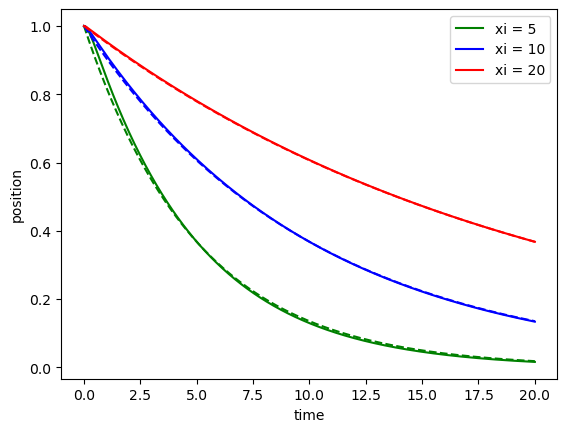

In [36]:
# Time points same as above
for c, xi in [['g', 5], ['b', 10], ['r', 20]]: 
    solution = odeint(derivative, [x,v], T, args=(m, gamma, xi))
    positions = solution[:,0]
    plt.plot(T, positions, label=f'xi = {xi}', color=c)
    plt.plot(T, x*np.exp(-gamma/xi*T), ls='--', color=c)

plt.xlabel('time')
plt.ylabel('position')
plt.legend()

### Friction and viscosity

Friction is higher in more viscous medium, e.g. honey compared to water. So what exactly is viscosity? If you are curious, read up on [viscosity on wikipedia](https://en.wikipedia.org/wiki/Viscosity#Simple_definition).

![image.png](figures/friction.png)

$$
F \sim \frac{Av}{d}  \quad \Rightarrow \quad F  = \eta \frac{Av}{d}
$$

Viscosity $\eta$ is the proportionality constant linking movement of molecules to frictional force.

Viscosity has dimension 

$$
[\eta] = \left[ \frac{Fd}{Av}\right] = \frac{energy \times time}{volume} = \frac{force \times time}{area}
$$

Viscosity is typically measured in $N s/m^2$ and relevant values for us are

 * water: $0.001 \frac{Ns}{m^2}$
 * cytosol: $0.003 \frac{Ns}{m^2}$
 


## Friction forces on a particle
If we pull a sphere through a medium with viscosity $\eta$, what will the required force depend on?

 - viscosity: the higher the viscosity, the higher the required force
 - velocity: the faster, the higher the required force. 
 - size: the bigger the object, the larger the force. 
 
So how do these quantities determine the force exactly? It turns out there is only one way to combine them such that the result has the dimensions of a force:

$$
F \sim \eta v r \quad \mathrm{since}\quad [N] \sim \left[\frac{N s}{m^2}\right]\times \left[\frac{m}{s}\right]\times[m]
$$
Up to a prefactor, this is the famous [Stokes' law](https://en.wikipedia.org/wiki/Stokes'_law). Stokes calculated that for a sphere, the relationship between frictional force, size, velocity and viscosity is given by 
$$
F = 6\pi \eta v r
$$


### How fast could molecular motors move cargo in principle?

We discussed earlier that molecular motors exert forces in the pico-newton range (say 5pN). With that force, how fast can one pull a vesicle of 100nm radius through the cytosol?
$$
v = \frac{F}{6\pi \eta r} \approx \frac{5\times 10^{-12}N m^2}{20\times 0.003 N s 10^{-7}m} = \frac{10^{-5}m}{0.012s} \approx 0.001 \frac{m}{s}
$$
